# Logistic Regression Case Study: Lead Scoring

## Problem Statement
A company faces low lead conversion rates despite acquiring many leads through various channels (e.g., ads, referrals). To improve efficiency, they aim to identify high-potential "Hot Leads" to prioritize sales efforts and boost conversion rates.

## Objectives
- Develop a **lead scoring model** using logistic regression to predict lead conversion likelihood.
- Prioritize high-potential leads for the sales team to improve efficiency.

## Lead Conversion Process
1. **Lead Acquisition**: Collect leads from marketing campaigns, website traffic, and referrals.
2. **Lead Engagement**: Leads interact with the platform (e.g., browsing, form submissions).
3. **Lead Qualification**: Use collected data to qualify leads.
4. **Lead Conversion**: Sales team focuses on qualified leads to convert them into customers.

## Challenges
- Large volume of leads with a low conversion rate.
- Efficient allocation of sales team resources.
- Ensuring sufficient data quality for predictions.

## Solution Outline
- **Logistic Regression**: Predict conversion probabilities for each lead.
- **Lead Scoring**: Rank leads by their conversion likelihood.
- **Feature Engineering**: Use demographics, engagement, and interaction data.
- **Evaluation**: Validate the model using metrics like precision, recall, and ROC-AUC.

This streamlined approach helps optimize sales efforts by focusing on high-potential leads.


In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Description: Lead Scoring Case Study

The dataset contains **37 columns** and represents information about leads collected by a company. The goal is to predict the likelihood of a lead being converted into a customer using the available features.

---



In [ ]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

This dataset includes **behavioral data**, **demographic information**, and **engagement metrics**, enabling the development of a logistic regression model for lead scoring. The model aims to identify high-potential leads and optimize the conversion process.

In [ ]:
df.shape

(9240, 37)

In [ ]:
# checking non null count and datatype of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
# Describing data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
df['How did you hear about X Education'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [ ]:
df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [ ]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

# Data Cleaning

## 1. Handling 'Select' Levels in Categorical Variables

- Many categorical columns contain the value **'Select'**, which likely indicates that the customer did not choose any option from a list.
- These **'Select'** values are equivalent to NULL or missing values.
- To clean the data, we will replace all occurrences of **'Select'** with NULL (or `NaN` in Python).

### Steps:
1. Identify columns where the **'Select'** value is present.
2. Replace all **'Select'** entries with NULL (`NaN`).
3. Proceed with further cleaning or imputation for missing values.

In [ ]:
df = df.replace('Select', np.nan)

In [ ]:
round(df.isnull().sum()/len(df.index),2)*100

,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,1.0
Total Time Spent on Website,0.0
Page Views Per Visit,1.0


We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

In [ ]:
# dropping the columns with missing values greater than or equal to 40% .
df=df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

<Axes: xlabel='count', ylabel='Specialization'>

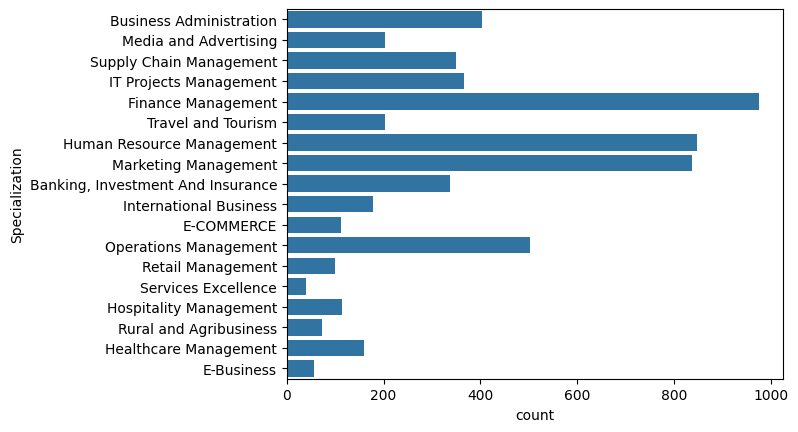

In [ ]:
sns.countplot(df['Specialization'])

Dealing With Missing Data

In [ ]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')
# Imputing the missing data in the tags column with 'Will revert after reading the email'
df['Tags']=df['Tags'].replace(np.nan,'Will revert after reading the email')

<Axes: xlabel='count', ylabel='What matters most to you in choosing a course'>

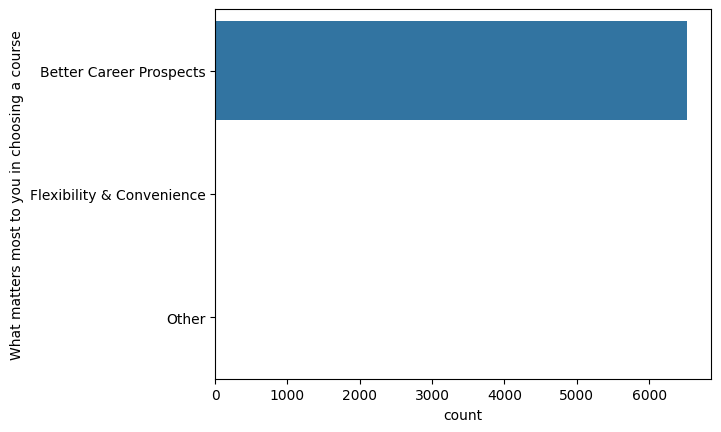

In [ ]:
# Visualizing this column
sns.countplot(df['What matters most to you in choosing a course'])

# Column Removed: *What matters most to you in choosing a course*

### Reason:
- Highly skewed: **100%** of values in "Better Career Prospects."
- No meaningful variability or predictive value.

### Action:
- Dropped the column to simplify the dataset and focus on relevant features.


In [ ]:
df=df.drop('What matters most to you in choosing a course',axis=1)

In [ ]:
# Finding the percentage of the different categories of this column:
round(df['What is your current occupation'].value_counts(normalize=True),2)*100

,proportion
What is your current occupation,
Unemployed,85.0
Working Professional,11.0
Student,3.0
Other,0.0
Housewife,0.0
Businessman,0.0


Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

In [ ]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed')

<Axes: xlabel='count', ylabel='Country'>

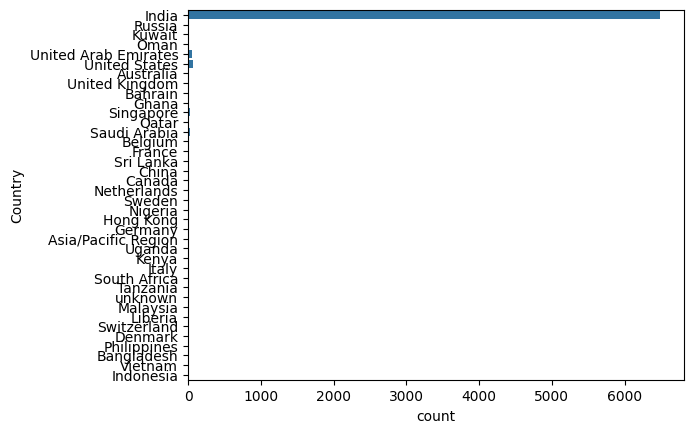

In [ ]:
sns.countplot(df['Country'])

In [ ]:
df['Country']=df['Country'].replace(np.nan,'India')

In [ ]:
round(df['City'].value_counts(normalize=True),2)*100

,proportion
City,
Mumbai,58.0
Thane & Outskirts,13.0
Other Cities,12.0
Other Cities of Maharashtra,8.0
Other Metro Cities,7.0
Tier II Cities,1.0


In [ ]:
df['City']=df['City'].replace(np.nan,'Mumbai')

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


# Exploratory Data Analysis (EDA)

## Objectives
- Understand the dataset structure and distributions.
- Identify patterns, correlations, and relationships between variables.
- Detect missing or inconsistent data.
- Gain insights for feature engineering and model building.

# Target Variable: *Converted*

### Description:
- **Converted**: Indicates whether a lead has been successfully converted.
  - **1**: Lead converted.
  - **0**: Lead not converted.

### Role:
- This is the target variable for predictive modeling.
- The goal is to predict the likelihood of conversion based on other features.

In [ ]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is 38%.

<Axes: xlabel='Lead Origin', ylabel='count'>

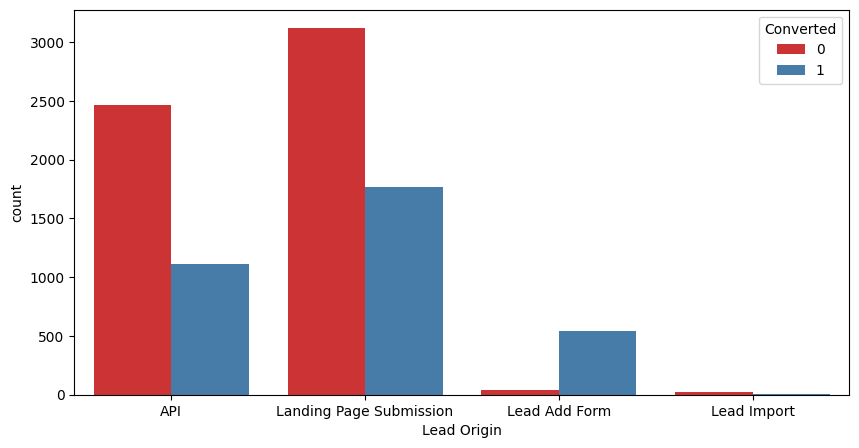

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df,palette='Set1')

# Inference: Lead Origin Analysis

### Observations:
1. **API and Landing Page Submission**:
   - Conversion Rate: 30-35%.
   - Count: Significant number of leads originate from these sources.
2. **Lead Add Form**:
   - Conversion Rate: >90%.
   - Count: Relatively low number of leads.
3. **Lead Import**:
   - Count: Very few leads originate from this source.

### Recommendations:
- Focus on improving the conversion rates for **API** and **Landing Page Submission** as they contribute the most leads.
- Increase lead generation from **Lead Add Form** due to its high conversion rate.
- Explore the potential of **Lead Import** if scalable.


<Axes: xlabel='Lead Source', ylabel='count'>

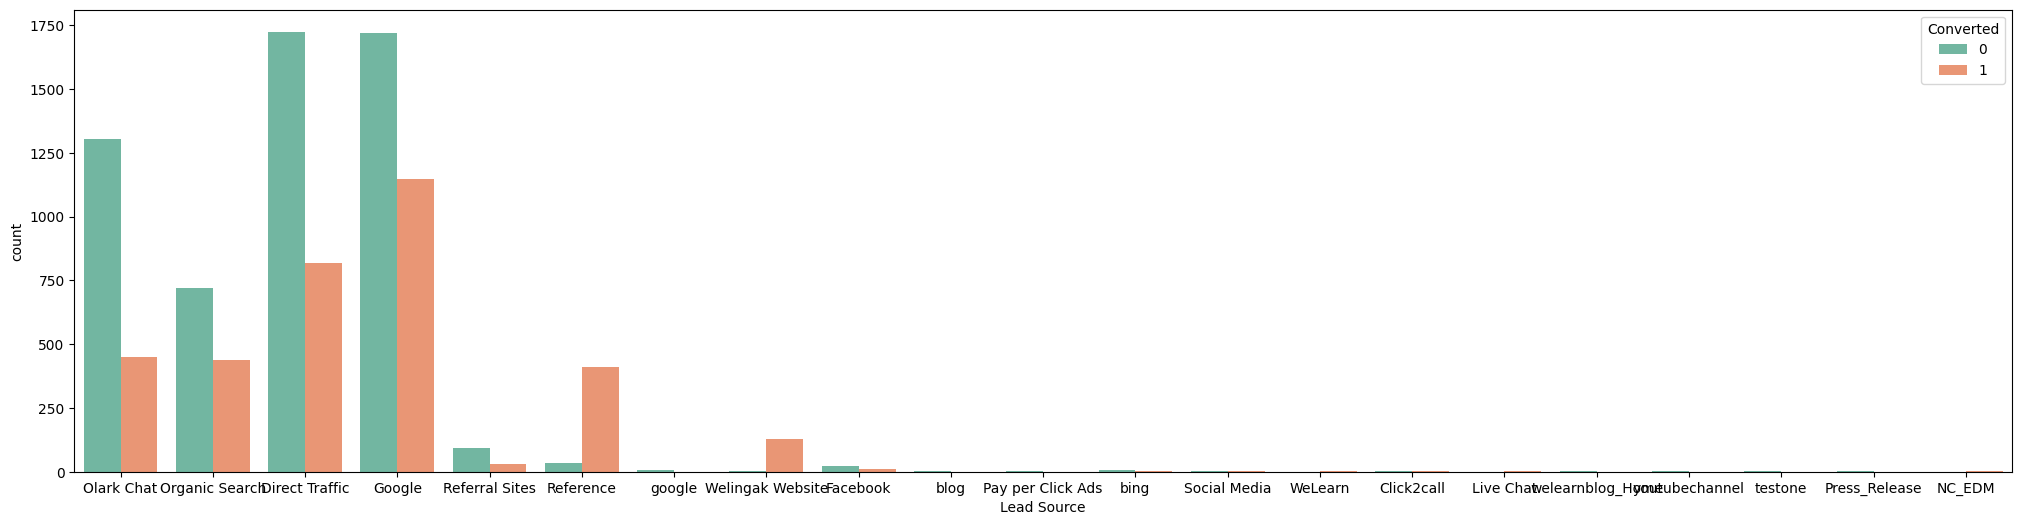

In [ ]:
#Lead Source
plt.figure(figsize=(25,6))
sns.countplot(x = "Lead Source", hue = "Converted", data = df, palette='Set2')

In [ ]:
# Need to replace 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

In [ ]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

<Axes: xlabel='Lead Source', ylabel='count'>

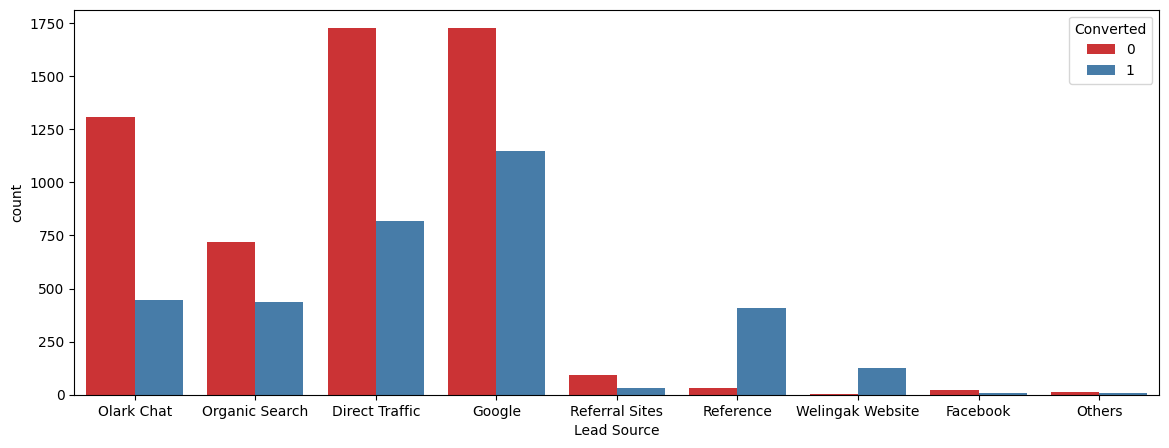

In [ ]:
# Visualizing again
plt.figure(figsize=(14,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df,palette='Set1')

<Axes: xlabel='Do Not Email', ylabel='count'>

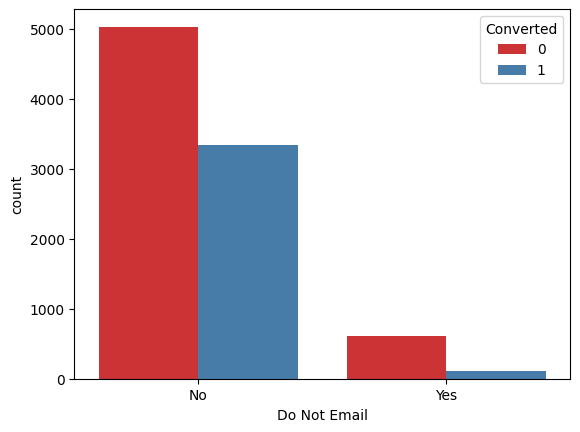

In [ ]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df,palette='Set1')

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

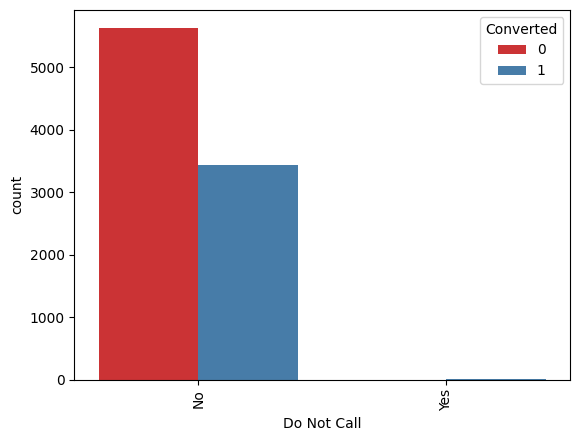

In [ ]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

<ipython-input-37-ed06343a5bf7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['TotalVisits'],orient='vert',palette='Set1')


<Axes: ylabel='TotalVisits'>

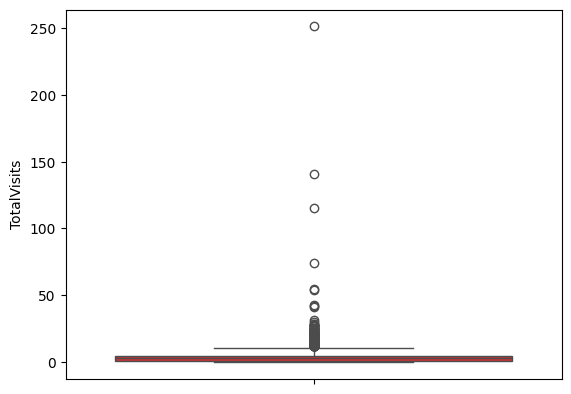

In [ ]:
sns.boxplot(df['TotalVisits'],orient='vert',palette='Set1')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Calculate correlation
correlation = df[['TotalVisits', 'Converted']].corr()

# Print correlation value
print("Correlation between TotalVisits and Converted:")
print(correlation)

Correlation between TotalVisits and Converted:
             TotalVisits  Converted
TotalVisits     1.000000   0.032855
Converted       0.032855   1.000000


# Decision: Remove *TotalVisits*

### Reason:
- Low correlation (0.0329) with the target variable (*Converted*).
- Likely not contributing meaningful information to the model.

### Action:
- Drop the column to simplify the dataset.

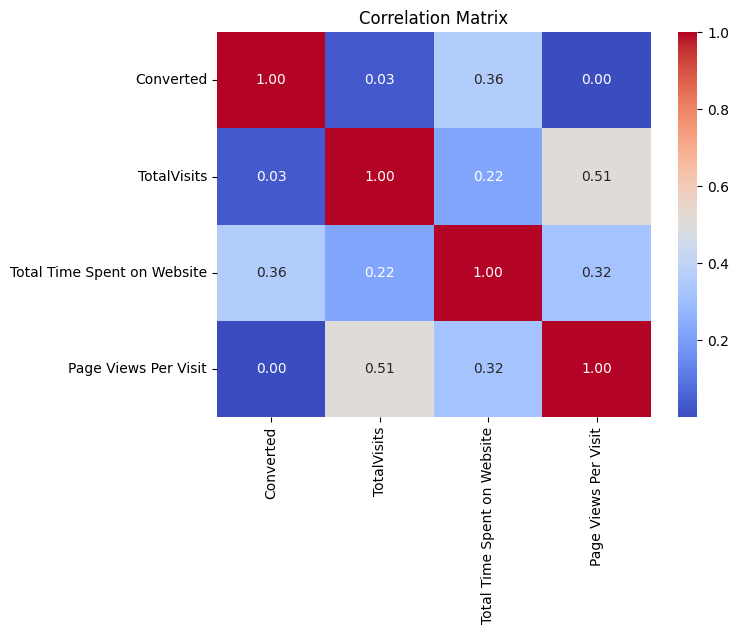

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Heatmap for all numerical variables
plt.figure(figsize=(7, 5))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:

correlation_matrix = numerical_df.corr()
threshold = 0.1
columns_to_drop = [col for col in correlation_matrix.index if col != 'Converted' and abs(correlation_matrix.loc[col, 'Converted']) < threshold]

# Drop the identified columns
df_cleaned = df.drop(columns=columns_to_drop)

print("Dropped columns:", columns_to_drop)
print("Updated DataFrame shape:", df_cleaned.shape)


Dropped columns: ['Lead Number', 'TotalVisits', 'Page Views Per Visit']
Updated DataFrame shape: (9074, 26)


In [ ]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<Axes: xlabel='Last Activity', ylabel='count'>

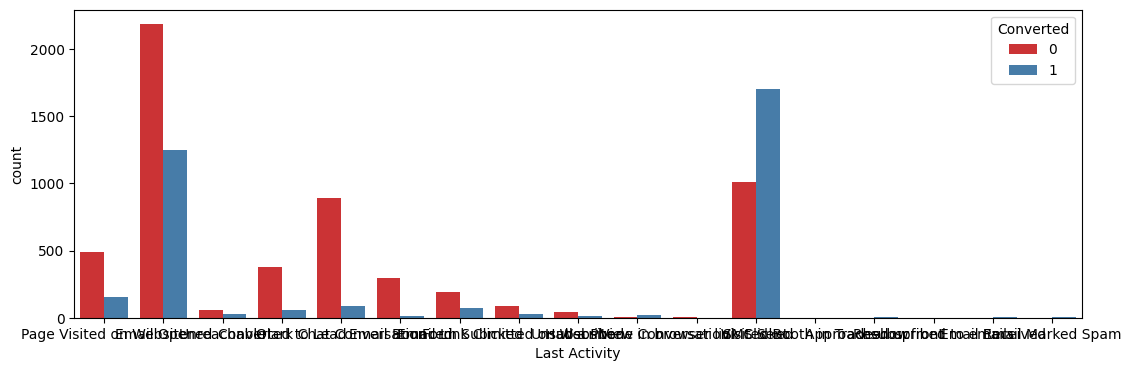

In [ ]:
#Last Activity
plt.figure(figsize=(13,4))
sns.countplot(x = "Last Activity", hue = "Converted", data = df,palette='Set1')

In [ ]:
# We can club the last activities to "Other_Activity" which are having less data.
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

<Axes: xlabel='Last Activity', ylabel='count'>

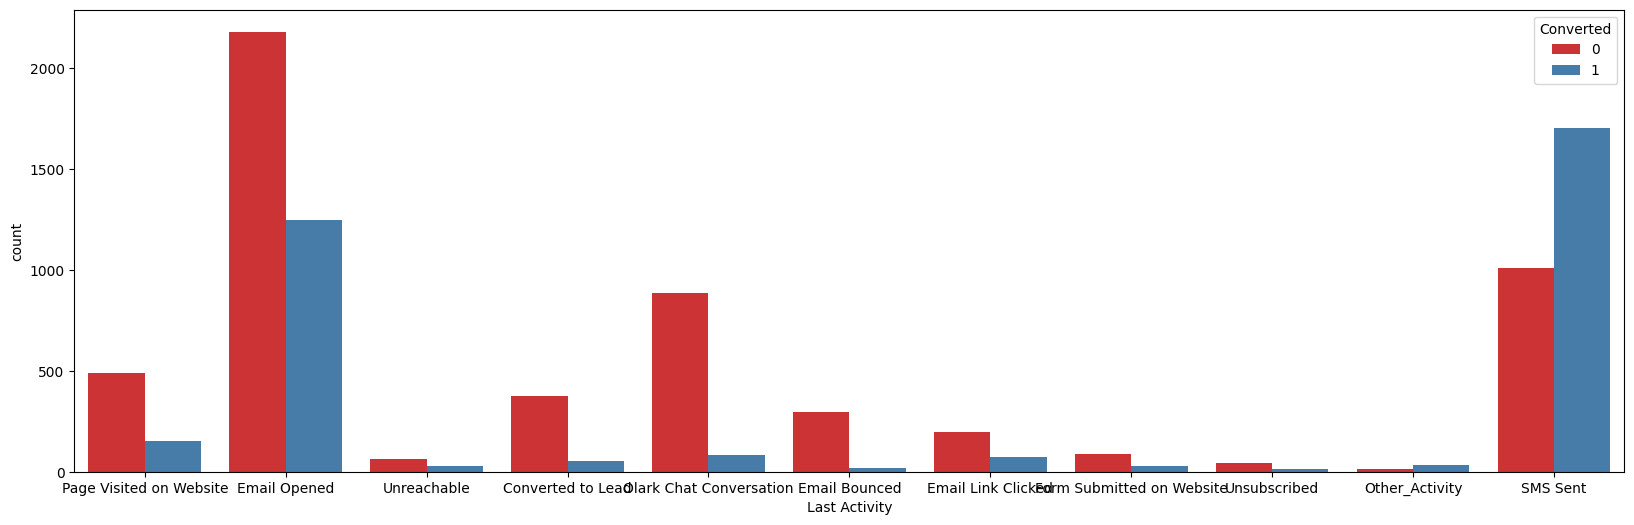

In [ ]:
# Visualizing again
plt.figure(figsize=(20,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df,palette='Set1')

many columns are not adding any information to the model, hence we can drop them for further analysis
### Removing Columns with Predominantly 'No' Values

I analyzed the dataset and identified columns where the majority of entries are "No." Since these columns provide little to no useful information, I decided to drop them to streamline the dataset and focus on more meaningful features.


In [ ]:
df = df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

In [ ]:
df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

In [ ]:
# Assuming df_cleaned is the cleaned DataFrame
df.to_csv('cleaned_dataset.csv', index=False)  # Save as CSV

# If you want to download the file to your local machine
from google.colab import files
files.download('cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Data Preparation

In this phase, the dataset is prepared for analysis by performing necessary transformations and cleaning. This includes handling missing values, removing irrelevant or redundant columns, and ensuring that the data is in the correct format for further processing or modeling. The goal is to have a clean, structured dataset that can be effectively used in analysis or machine learning models.


In [ ]:
lead_data = pd.read_csv("/content/cleaned_dataset.csv")

In [ ]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

In [ ]:
lead_data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

In [ ]:
lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']]

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,API,Organic Search,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,Converted to Lead,Others,Unemployed,Mumbai,Modified
...,...,...,...,...,...,...,...
9069,Landing Page Submission,Direct Traffic,Other_Activity,IT Projects Management,Unemployed,Mumbai,Email Marked Spam
9070,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Unemployed,Mumbai,SMS Sent
9071,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,Mumbai,SMS Sent
9072,Landing Page Submission,Google,SMS Sent,Human Resource Management,Unemployed,Other Metro Cities,SMS Sent


In [ ]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
#Dropping the columns for which dummies were created

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

# Already Executed So Throwing Error,When Running the Cell Again

In [ ]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,0,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,2.0,1532,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,1.0,305,1.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0,2.0,1428,1.0,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [ ]:

# Putting target variable to y
y = lead_data['Converted']

y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


### Building and Evaluating a Logistic Regression Model

After splitting the data into training and testing sets, we build a **Logistic Regression** model to predict the `Converted` target variable.

#### Steps:

1. **Model Initialization**:
   We initialize the Logistic Regression model with a random seed (`random_state=100`) to ensure reproducibility.

2. **Model Training**:
   We train the model on the training data (`X_train` and `y_train`) using the `.fit()` method.

3. **Prediction**:
   The trained model is used to predict the target variable (`y_pred`) for the test set (`X_test`).

4. **Model Evaluation**:
   - **Accuracy**: Measures the overall performance of the model.
   - **Confusion Matrix**: Shows the number of true positives, true negatives, false positives, and false negatives.
   - **Classification Report**: Provides precision, recall, F1-score, and support for each class.

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2928,0,0,2.0,397,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
973,1,0,2.0,190,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9060,0,0,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4648,0,0,2.0,1380,2.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7839,0,0,5.0,1584,2.5,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2928,0,0,-0.284595,-0.160255,-0.179666,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
973,1,0,-0.284595,-0.540048,-0.179666,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9060,0,0,-0.671384,-0.888650,-1.132538,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4648,0,0,-0.284595,1.643304,-0.179666,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7839,0,0,0.295588,2.017593,0.058552,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg_model = LogisticRegression(random_state=100)

In [ ]:
# Train the model using the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=100)

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [ ]:
y_pred = logreg_model.predict(X_test)

In [ ]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3184,0,0,0.143722,-0.591008,0.716169,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1435,0,0,0.391416,1.894051,1.151248,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7788,0,0,-0.351665,-0.743117,-0.153989,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4121,0,0,-0.847051,-0.878732,-1.024147,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3737,0,0,1.134496,-0.578179,2.456484,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Model Evaluation

After training the **Logistic Regression** model, the next step is to evaluate its performance on the test dataset (`X_test` and `y_test`). Evaluation metrics help us understand how well the model is predicting the target variable (`Converted`).

#### Key Evaluation Metrics:

1. **Accuracy**: This metric tells us the overall percentage of correct predictions made by the model. It is calculated as the ratio of correct predictions to the total number of predictions.

2. **Confusion Matrix**: A confusion matrix provides a summary of the model's predictions against the true values. It shows the number of true positives, true negatives, false positives, and false negatives.

3. **Classification Report**: The classification report includes several important metrics:
   - **Precision**: The proportion of positive predictions that are actually correct.
   - **Recall**: The proportion of actual positive cases that were correctly predicted.
   - **F1-Score**: The harmonic mean of precision and recall, providing a balance between them.
   - **Support**: The number of actual occurrences of each class in the dataset.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8153
Confusion Matrix:
[[1532  202]
 [ 301  688]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1734
           1       0.77      0.70      0.73       989

    accuracy                           0.82      2723
   macro avg       0.80      0.79      0.80      2723
weighted avg       0.81      0.82      0.81      2723



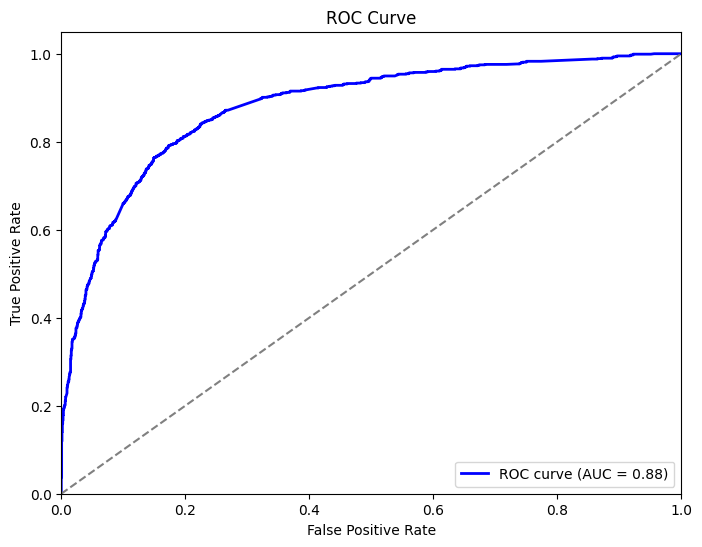

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_prob = logreg_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

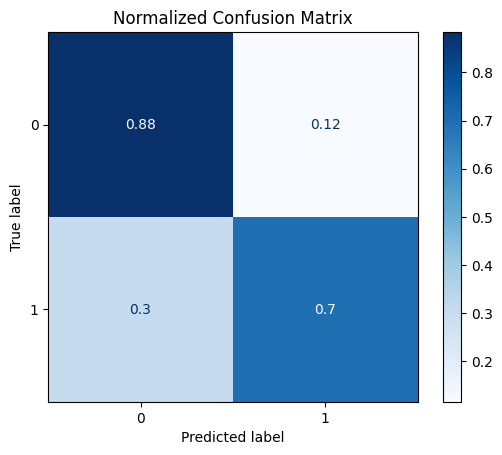

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot normalized confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg_model, X_test, y_test, cmap='Blues', normalize='true')
plt.title("Normalized Confusion Matrix")
plt.show()

In [ ]:
import joblib

# Save the model to a file
joblib.dump(logreg_model, 'logreg_model.pkl')

print("Model saved successfully!")


Model saved successfully!


In [ ]:
columns_used_in_training = X_train.columns.tolist()
joblib.dump(columns_used_in_training, 'columns_used_in_training.pkl')

['columns_used_in_training.pkl']

In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler
with open('scaler1.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=100, n_estimators=100, max_depth=10)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Predict probabilities for ROC-AUC
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)


# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[1574  160]
 [ 325  664]]
Accuracy: 0.8218876239441792
Precision: 0.8058252427184466
Recall: 0.6713852376137512
F1-Score: 0.7324875896304468
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1734
           1       0.81      0.67      0.73       989

    accuracy                           0.82      2723
   macro avg       0.82      0.79      0.80      2723
weighted avg       0.82      0.82      0.82      2723



In [ ]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8921510315897011


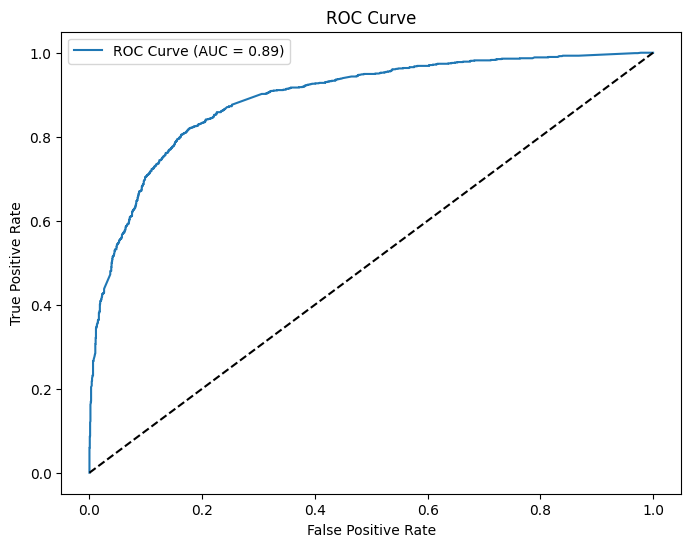

In [ ]:
# Plot ROC Curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Split your data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save X_test as a CSV file
X_test.to_csv('X_test.csv', index=False)

# Optionally, you can save y_test for reference
y_test.to_csv('y_test.csv', index=False)
